In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9728120770944584721
xla_global_id: -1
]


In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

print(gpus)


[]


In [3]:
!where python

D:\IDE\Anaconda\python.exe
D:\IDE\python\Interpreter\python.exe
C:\msys64\ucrt64\bin\python.exe
C:\Users\Monish. S\AppData\Local\Microsoft\WindowsApps\python.exe


In [7]:
#  Importing the compressed dataset
from zipfile import ZipFile
dataset = r"C:\Users\Monish. S\Downloads\Datasets\archivee.zip"

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print("The dataset is extracted ")

The dataset is extracted 


<p style="font-size:30px"'>Importing The Dependencies</p>

In [9]:
import os 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir(r"C:\Users\Monish. S\Downloads\Datasets\DL datasets\data\with_mask")

In [11]:
with_mask_files[0:5]

['with_mask_1.jpg',
 'with_mask_10.jpg',
 'with_mask_100.jpg',
 'with_mask_1000.jpg',
 'with_mask_1001.jpg']

In [12]:
without_mask_files = os.listdir(r"C:\Users\Monish. S\Downloads\Datasets\DL datasets\data\without_mask")

In [13]:
without_mask_files[:5]

['without_mask_1.jpg',
 'without_mask_10.jpg',
 'without_mask_100.jpg',
 'without_mask_1000.jpg',
 'without_mask_1001.jpg']

In [14]:
print(f"No of mask images:{len(with_mask_files)}")

No of mask images:3725


In [15]:
print(f"No of without mask images:{len(without_mask_files)}")

No of without mask images:3828


<p style="font-size:30px"'>Creating the labels for the two class of images</p>

In [17]:
#  Create the labels 
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [18]:
with_mask_labels[:5]

[1, 1, 1, 1, 1]

In [19]:
without_mask_labels[:5]

[0, 0, 0, 0, 0]

In [20]:
len(with_mask_labels)

3725

In [21]:
len(without_mask_labels)

3828

In [22]:
labels = with_mask_labels + without_mask_labels
len(labels)

7553

**Displaying images**

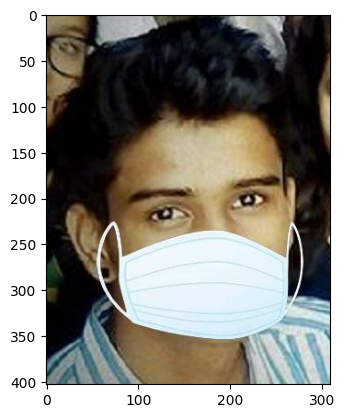

In [24]:
img = mpimg.imread(r"C:\Users\Monish. S\Downloads\Datasets\DL datasets\data\with_mask\with_mask_1000.jpg")
imgplot = plt.imshow(img)
plt.show()

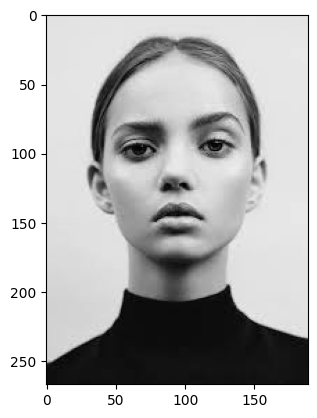

In [25]:
img_no_mask = mpimg.imread(r"C:\Users\Monish. S\Downloads\Datasets\DL datasets\data\without_mask\without_mask_790.jpg")
imgplot_no_mask = plt.imshow(img_no_mask)
plt.show()

<p style="font-size:30px"'>Image Processing</p>
1. Resize the images<br>
2. Convert the images to numpy arrays

In [27]:
with_mask_path = "C:/Users/Monish. S/Downloads/Datasets/DL datasets/data/with_mask/"

data= []

for img_file in with_mask_files:

    image = Image.open(with_mask_path + img_file)
    image = image.resize((120,120))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

D:\IDE\Anaconda\envs\tf\lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [28]:
without_mask_path = "C:/Users/Monish. S/Downloads/Datasets/DL datasets/data/without_mask/"


for img_file in without_mask_files:

    image = Image.open(without_mask_path + img_file)
    image = image.resize((120,120))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [29]:
data

[array([[[49, 57, 31],
         [46, 55, 34],
         [59, 61, 43],
         ...,
         [35, 42, 33],
         [26, 29, 17],
         [34, 41, 18]],
 
        [[47, 55, 31],
         [50, 59, 37],
         [62, 64, 40],
         ...,
         [22, 24, 12],
         [36, 41, 31],
         [31, 41, 24]],
 
        [[52, 59, 38],
         [51, 60, 37],
         [59, 62, 33],
         ...,
         [46, 43, 24],
         [31, 35, 29],
         [15, 24, 13]],
 
        ...,
 
        [[64, 74, 39],
         [68, 78, 42],
         [73, 84, 49],
         ...,
         [ 5,  4,  0],
         [19, 18, 13],
         [24, 24, 19]],
 
        [[58, 71, 34],
         [61, 71, 40],
         [69, 77, 51],
         ...,
         [14, 14, 11],
         [15, 13, 10],
         [13,  8,  6]],
 
        [[54, 68, 30],
         [54, 64, 38],
         [58, 63, 42],
         ...,
         [18, 18, 16],
         [17, 13, 12],
         [19, 12, 13]]], dtype=uint8),
 array([[[118,  62,  16],
         [124,  

In [30]:
type(data)

list

In [31]:
type(data[0])

numpy.ndarray

In [32]:
type(labels)

list

In [33]:
data[0].shape

(120, 120, 3)

In [34]:
len(data)

7553

In [35]:
#  Converting image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [36]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [37]:
print(X.shape)
print(Y.shape)

(7553, 120, 120, 3)
(7553,)


In [38]:
print(Y)

[1 1 1 ... 0 0 0]


<p style="font-size:30px"> Train Test Split</p>

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [41]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 120, 120, 3) (6042, 120, 120, 3) (1511, 120, 120, 3)


In [43]:
X_train[0]

array([[[225, 233, 202],
        [207, 211, 185],
        [190, 190, 172],
        ...,
        [188, 185, 169],
        [180, 175, 151],
        [166, 180, 136]],

       [[222, 225, 217],
        [203, 204, 198],
        [201, 198, 193],
        ...,
        [199, 193, 185],
        [176, 170, 155],
        [162, 182, 145]],

       [[203, 202, 210],
        [221, 220, 226],
        [194, 191, 195],
        ...,
        [184, 176, 176],
        [177, 169, 165],
        [187, 197, 176]],

       ...,

       [[158, 178, 199],
        [156, 176, 191],
        [167, 188, 199],
        ...,
        [ 89, 100,  72],
        [107, 114,  87],
        [ 97, 103,  77]],

       [[152, 178, 197],
        [167, 189, 206],
        [177, 196, 212],
        ...,
        [104, 111,  79],
        [101, 107,  69],
        [ 98,  98,  42]],

       [[162, 193, 210],
        [176, 197, 219],
        [178, 193, 216],
        ...,
        [103, 107,  70],
        [ 82,  84,  50],
        [ 96,  93,  58]]

In [44]:
#  Scaling the data

X_train_scaled = X_train / 255

X_test_scaled = X_test / 255

In [45]:
X_train_scaled[0]

array([[[0.88235294, 0.91372549, 0.79215686],
        [0.81176471, 0.82745098, 0.7254902 ],
        [0.74509804, 0.74509804, 0.6745098 ],
        ...,
        [0.7372549 , 0.7254902 , 0.6627451 ],
        [0.70588235, 0.68627451, 0.59215686],
        [0.65098039, 0.70588235, 0.53333333]],

       [[0.87058824, 0.88235294, 0.85098039],
        [0.79607843, 0.8       , 0.77647059],
        [0.78823529, 0.77647059, 0.75686275],
        ...,
        [0.78039216, 0.75686275, 0.7254902 ],
        [0.69019608, 0.66666667, 0.60784314],
        [0.63529412, 0.71372549, 0.56862745]],

       [[0.79607843, 0.79215686, 0.82352941],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76078431, 0.74901961, 0.76470588],
        ...,
        [0.72156863, 0.69019608, 0.69019608],
        [0.69411765, 0.6627451 , 0.64705882],
        [0.73333333, 0.77254902, 0.69019608]],

       ...,

       [[0.61960784, 0.69803922, 0.78039216],
        [0.61176471, 0.69019608, 0.74901961],
        [0.65490196, 0

<p style="font-size:30px"'>Building Neural Network (CNN)</p>

In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:

print("GPU Available: ", tf.config.list_physical_devices('GPU'))

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=(3,3),activation = 'relu',input_shape=(120,120,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))
          
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

GPU Available:  []


In [49]:
#  Compile the neural network 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [50]:
# Training the neural network 
history = model.fit(X_train_scaled, y_train, validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 127s 740ms/step - loss: 0.4417 - acc: 0.7916 - val_loss: 0.2658 - val_acc: 0.8826
Epoch 2/5
170/170 [==============================] - 127s 747ms/step - loss: 0.2813 - acc: 0.8959 - val_loss: 0.2234 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 126s 743ms/step - loss: 0.2259 - acc: 0.9156 - val_loss: 0.1808 - val_acc: 0.9405
Epoch 4/5
170/170 [==============================] - 127s 745ms/step - loss: 0.2098 - acc: 0.9286 - val_loss: 0.1771 - val_acc: 0.9421
Epoch 5/5
170/170 [==============================] - 125s 737ms/step - loss: 0.1769 - acc: 0.9367 - val_loss: 0.1772 - val_acc: 0.9455


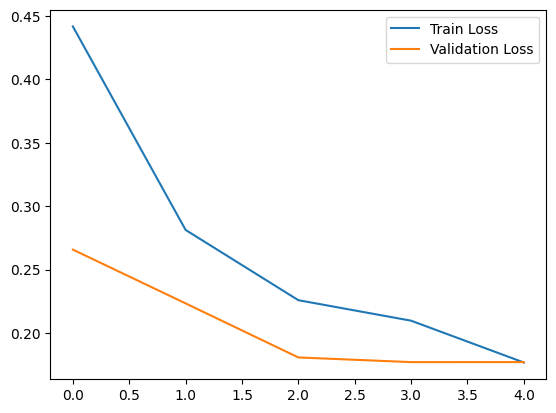

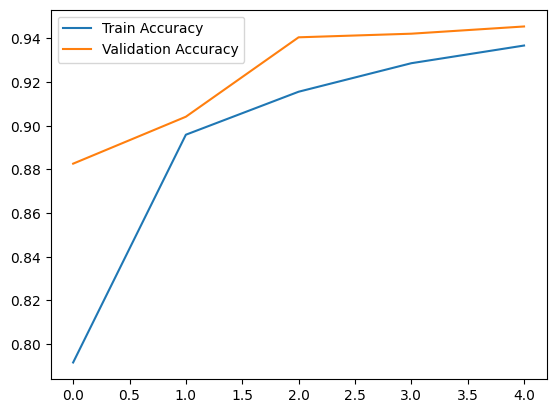

In [51]:
#  Plot the loss value 
plt.plot(history.history['loss'],label = 'Train Loss')
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.legend()
plt.show()

#  Plot the accuracy value 
plt.plot(history.history['acc'],label = 'Train Accuracy')
plt.plot(history.history['val_acc'],label = 'Validation Accuracy')
plt.legend()
plt.show()